In [19]:
import sys
import dotenv
import os
dotenv.load_dotenv()
sys.path.append(os.getenv('MAINDIR'))
from helpers.ds_helpers import X_y_split, open_and_prepare_df
from helpers.models_helpers import plot_results
import numpy as np
from scipy import stats
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.linear_model import Ridge
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [16]:
df = open_and_prepare_df('features')
x_strings = ['nlp_2', 'nlp_3', 'nlp_4', 'nlp_5', 'nlp_all']
models = [Ridge(alpha=200),\
          svm.SVR(kernel='linear', C=0.0255)]

In [17]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8)
for model in models:
    print(model)
    for x_string in x_strings:
        X, y = X_y_split(df, x_string)

        keras_predictions = []
        y_main_true = []

        for train_index, test_index in kfold.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            model = model

            model.fit(X_train, y_train)
            keras_prediction = model.predict(X_test)

            keras_predictions = np.concatenate((keras_predictions, keras_prediction))
            y_main_true = np.concatenate((y_main_true, y_test))
        
        print(x_string, round(stats.pearsonr(y_main_true, keras_predictions)[0], 3), \
              round(mean_absolute_error(y_main_true, keras_predictions), 3))

Ridge(alpha=200)
nlp_2 0.325 2.848
nlp_3 0.375 2.706
nlp_4 0.285 2.865
nlp_5 0.407 2.677
nlp_all 0.497 2.524
SVR(C=0.0255, kernel='linear')
nlp_2 0.332 2.668
nlp_3 0.393 2.527
nlp_4 0.262 2.746
nlp_5 0.393 2.563
nlp_all 0.511 2.386


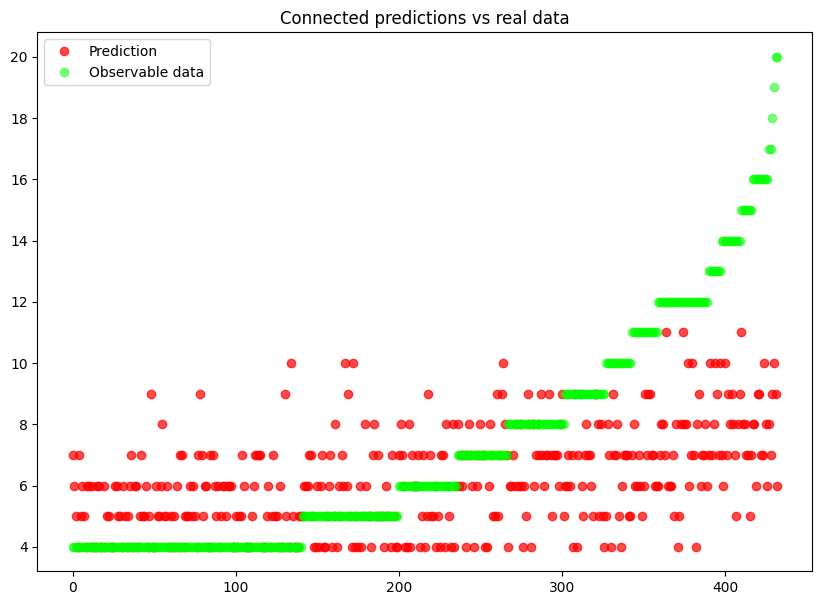

In [20]:
plot_results(keras_predictions, y_main_true)